<a href="https://colab.research.google.com/github/helly-22/Predictive-Maintenance-IoT/blob/main/predictive_maintenance_hydraulic_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predictive Maintenance of Hydraluic System

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_validate,GridSearchCV,RandomizedSearchCV
from tpot import TPOTClassifier
from scipy.stats import randint
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [ ]:
!wget "https://archive.ics.uci.edu/ml/machine-learning-databases/00447/data.zip"
!unzip "data.zip"

--2023-04-12 05:22:14--  https://archive.ics.uci.edu/ml/machine-learning-databases/00447/data.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76601704 (73M) [application/x-httpd-php]
Saving to: ‘data.zip’

data.zip            100%[===================>]  73.05M  18.9MB/s    in 4.1s    

2023-04-12 05:22:19 (17.7 MB/s) - ‘data.zip’ saved [76601704/76601704]

Archive:  data.zip
  inflating: CE.txt                  
  inflating: CP.txt                  
  inflating: description.txt         
  inflating: EPS1.txt                
  inflating: FS1.txt                 
  inflating: FS2.txt                 
  inflating: profile.txt             
  inflating: PS1.txt                 
  inflating: PS2.txt                 
  inflating: PS3.txt                 
  inflating: PS4.txt                 
  inflating: PS5.txt             

# 1- Data Preperation

In [ ]:
a=[]
for i in ["PS1","PS2","PS3","PS4","PS5","PS6"]:
    PS=np.genfromtxt(i+".txt")
    a.append(PS)
ps1,ps2,ps3,ps4,ps5,ps6=a

In [ ]:
a

[array([[151.47, 151.45, 151.52, ..., 151.1 , 151.21, 151.19],
        [151.11, 151.12, 151.16, ..., 150.79, 150.8 , 150.86],
        [150.81, 150.79, 150.84, ..., 150.43, 150.54, 150.62],
        ...,
        [151.73, 151.78, 151.84, ..., 151.73, 151.73, 151.83],
        [151.77, 151.77, 151.75, ..., 151.68, 151.71, 151.78],
        [151.83, 151.78, 151.77, ..., 151.73, 151.71, 151.7 ]]),
 array([[125.5 , 125.39, 125.4 , ..., 125.11, 125.14, 125.1 ],
        [125.06, 125.08, 125.09, ..., 125.13, 125.09, 125.04],
        [125.13, 125.27, 125.23, ..., 124.73, 124.77, 124.88],
        ...,
        [125.41, 125.49, 125.63, ..., 125.84, 125.84, 125.94],
        [125.91, 125.73, 125.59, ..., 125.73, 125.86, 125.91],
        [125.88, 125.86, 125.84, ..., 125.77, 125.66, 125.77]]),
 array([[2.305, 2.305, 2.336, ..., 2.25 , 2.25 , 2.211],
        [2.281, 2.32 , 2.305, ..., 2.211, 2.195, 2.219],
        [2.227, 2.187, 2.156, ..., 2.305, 2.32 , 2.266],
        ...,
        [2.375, 2.437, 2.359, 

In [ ]:
ynp.isnan(ps1).sum()

NameError: ignored

In [ ]:
ps1_arr=ps1.mean(axis=1)
ps2_arr=ps2.mean(axis=1)
ps3_arr=ps3.mean(axis=1)
ps4_arr=ps4.mean(axis=1)
ps5_arr=ps5.mean(axis=1)
ps6_arr=ps6.mean(axis=1)

In [ ]:
yps1_arr=ps1.mean(axis=1)
ps2_arr=ps2.mean(axis=1)
ps3_arr=ps3.mean(axis=1)
ps4_arr=ps4.mean(axis=1)
ps5_arr=ps5.mean(axis=1)
ps6_arr=ps6.mean(axis=1)

In [ ]:
df = pd.DataFrame({"PS1":ps1_arr,"PS2":ps2_arr,"PS3":ps3_arr,"PS4":ps4_arr,"PS5":ps5_arr,"PS6":ps6_arr})

In [ ]:
eps1 = np.genfromtxt("EPS1.txt")
esp1_arr=eps1.mean(axis=1)

df["ESP1"]=esp1_arr

In [ ]:
a=[]
for i in ["FS1","FS2"]:
    FS=np.genfromtxt(i+".txt")
    a.append(FS)
fs1,fs2=a

fs1_arr=fs1.mean(axis=1)
fs2_arr=fs2.mean(axis=1)

df["FS1"]=fs1_arr
df["FS2"]=fs2_arr

In [ ]:
a=[]
for i in ["TS1","TS2","TS3","TS4"]:
    TS=np.genfromtxt(i+".txt")
    a.append(TS)
ts1,ts2,ts3,ts4=a

ts1_arr=ts1.mean(axis=1)
ts2_arr=ts2.mean(axis=1)
ts3_arr=ts3.mean(axis=1)
ts4_arr=ts4.mean(axis=1)

df["TS1"]=ts1_arr
df["TS2"]=ts2_arr
df["TS3"]=ts3_arr
df["TS4"]=ts4_arr

In [ ]:
vs1=np.genfromtxt("VS1.txt")

vs1_arr=vs1.mean(axis=1)

df["VS1"]=vs1_arr

In [ ]:
a=[]
for i in ["CE","CP"]:
    C=np.genfromtxt(i+".txt")
    a.append(C)
ce,cp=a

ce_arr=ce.mean(axis=1)

cp_arr=cp.mean(axis=1)

df["CE"]=ce_arr
df["CP"]=cp_arr

In [ ]:
se=np.genfromtxt("SE.txt")

se_arr=se.mean(axis=1)

df["SE"]=se_arr

In [ ]:
target = np.genfromtxt("profile.txt")

df_temp=pd.DataFrame(target,columns=["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"])
df_final=pd.concat([df,df_temp],axis=1)

In [ ]:
df_final.head(10)

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,160.673492,109.466914,1.991475,0.0,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0,1.0
1,160.603320,109.354890,1.976234,0.0,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0,1.0
2,160.347720,109.158845,1.972224,0.0,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0,1.0
3,160.188088,109.064807,1.946576,0.0,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0,1.0
4,160.000472,108.931434,1.922707,0.0,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0,1.0
5,159.920210,108.887682,1.913285,0.0,9.301160,9.206877,2501.007067,6.699023,10.178720,40.659450,...,38.212067,0.572683,19.149683,1.072083,59.563333,3.0,100.0,0.0,130.0,1.0
6,159.672675,108.676466,1.888100,0.0,9.233942,9.143320,2494.416900,6.698573,10.140810,41.463633,...,38.932100,0.573033,18.666383,1.081683,59.789900,3.0,100.0,0.0,130.0,1.0
7,159.614452,108.651745,1.874894,0.0,9.194159,9.105058,2489.421533,6.678027,10.095978,42.215267,...,39.558967,0.572000,18.178433,1.078700,59.590617,3.0,100.0,0.0,130.0,1.0
8,159.475745,108.529738,1.858120,0.0,9.144616,9.057067,2484.419067,6.671652,10.039710,42.891983,...,40.080533,0.567067,18.334867,1.115083,59.608883,3.0,100.0,0.0,130.0,1.0
9,159.437997,108.510885,1.841063,0.0,9.104831,9.019265,2480.434867,6.659990,9.997762,43.532833,...,40.612550,0.571683,18.205733,1.129133,59.473733,3.0,100.0,0.0,130.0,1.0


# 2- EDA

<Axes: >

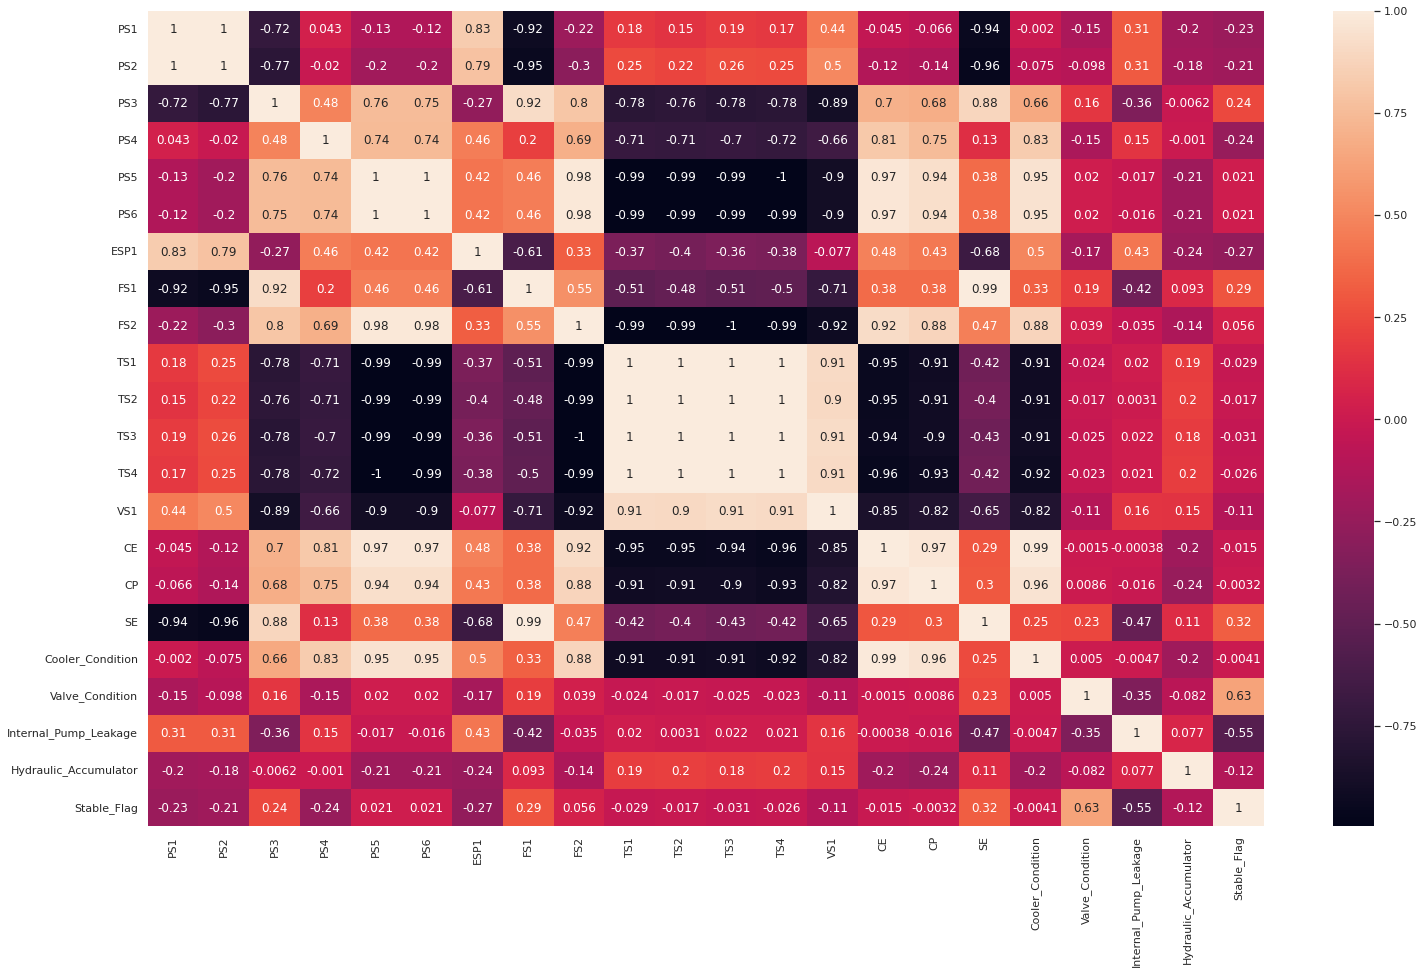

In [ ]:
fig=plt.gcf()
fig.set_size_inches((25,15))
sns.heatmap(df_final.corr(),annot=True)

In [ ]:
df_final_corr = df_final.corr().sort_values(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],ascending=False)
df_final_corr_target = df_final_corr[["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"]]
df_final_corr_target.drop(["Cooler_Condition","Valve_Condition","Internal_Pump_Leakage","Hydraulic_Accumulator","Stable_Flag"],axis=0,inplace=True)
df_final_corr_target

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
CE,0.991943,-0.001463,-0.000381,-0.204599,-0.015316
CP,0.956220,0.008605,-0.015806,-0.241432,-0.003231
PS6,0.950316,0.020284,-0.016262,-0.210282,0.021353
PS5,0.949962,0.020317,-0.016579,-0.209262,0.021458
FS2,0.881340,0.038651,-0.034926,-0.139471,0.055942
PS4,0.832446,-0.146385,0.154950,-0.001021,-0.244314
PS3,0.662852,0.163278,-0.355070,-0.006242,0.237027
ESP1,0.497514,-0.174618,0.426320,-0.239692,-0.267649
FS1,0.330446,0.190141,-0.421702,0.092695,0.288568
SE,0.249273,0.231354,-0.469243,0.112756,0.324695


# 3- Data Preprocessing

In [ ]:
x = df_final.iloc[:,:-5]
y = df_final.iloc[:,-5:]

In [ ]:
target_1=y.iloc[:,-5]
target_2=y.iloc[:,-4]
target_3=y.iloc[:,-3]
target_4=y.iloc[:,-2]

final_target=y.iloc[:,-1]
final_target=(final_target.astype(int))

## Target 1

In [ ]:
round((target_1.value_counts(normalize=True)), 4)

100.0    0.3361
3.0      0.3320
20.0     0.3320
Name: Cooler_Condition, dtype: float64

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,target_1,test_size=0.2,random_state=1)

In [ ]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# RL

In [ ]:
!pip install rl


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.1/443.1 kB 4.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for rl: filename=rl-3.1-cp39-cp39-linux_x86_64.whl size=193773 sha256=c620097568e97d779b08ce9a710d40d3f2cc7573075319e484528760a67f6997
  Stored in directory: /root/.cache/pip/wheels/fc/d9/17/054e470aeca1588fc2635afce1f54d79abafbaa9ddff37c7f1
Successfully built rl


In [ ]:
!pip install keras-rl --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tf-agents[reverb]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 31.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 624.4/624.4 kB 27.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 63.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 5.6 MB/s eta 0:00:00
  Created wheel for gym: filename=gym-0.23.0-py3-none-any.whl size=697660 sha256=bd60157effef0eeea57202c1e3dd2e0908718a646d05ffc0947dbcfa34c9677e
  Stored in directory: /root/.cache/pip/wheels/96/b9/bb/994c1324b65e39dd1cd7b8ba92e5fb766dd77980929414a866
Successfully built gym
  Attempting uninstall: pygame
    Found existing installation: pygame 2.3.0
    Uninstalli

In [ ]:

from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Convolution2D, Permute, Input
from keras.optimizers import Adam

from rl.callbacks import Callback
from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, BoltzmannQPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint

In [ ]:
import rl
import rl.callbacks

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from tpot import TPOTRegressor
from sklearn.preprocessing import StandardScaler
from rl import agents

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from rl.q_learning import QLearningAgent

ModuleNotFoundError: ignored

In [ ]:
# Define the Q-learning agent
agent = QLearningAgent(state_space=X.shape[1], action_space=2, discount_factor=0.95, learning_rate=0.1)

# Train the agent using the training data
for i in range(len(train_x)):
    state = train_x[i]
    action = agent.act(state)
    reward = train_y[i]
    next_state = train_x[i+1] if i < len(train_x)-1 else None
    agent.update(state, action, reward, next_state)

# Define the TPOT pipeline space
pipeline = {
    'preprocess': [StandardScaler()],
    'feature_selection': ['passthrough', 'variance_threshold', 'select_percentile'],
    'regressor': ['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor']
}

# Use TPOT to optimize the pipeline
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2, config_dict={'tpot': pipeline})
tpot.fit(train_x, train_y)
y_pred = tpot.predict(test_x)

# Evaluate the performance of the optimized pipeline
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)
print(f'MSE: {mse}, R^2: {r2}')


NameError: ignored

In [ ]:
df_final.shape[1:]

(22,)

In [ ]:
import numpy as np
import pandas as pd
from tpot import TPOTRegressor
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from rl.agents import DQNAgent
from rl.policy import EpsGreedyQPolicy
from rl.memory import SequentialMemory

# Define the DQN model
model = Sequential()
model.add(Dense(32, input_shape=df_final.shape[1:], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Define the DQN agent
memory = SequentialMemory(limit=50000, window_length=1)
policy = EpsGreedyQPolicy(eps=0.1)
agent = DQNAgent(model=model, nb_actions=2, memory=memory, nb_steps_warmup=10,
                 target_model_update=1e-2, policy=policy)

# Compile the DQN agent
agent.compile(optimizer='adam', metrics=['mae'])

# Train the agent using the training data
history = agent.fit(train_x, train_y, batch_size=32, nb_epoch=50, verbose=0)

# Define the TPOT pipeline space
pipeline = {
    'preprocess': [StandardScaler()],
    'feature_selection': ['passthrough', 'variance_threshold', 'select_percentile'],
    'regressor': ['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor']
}

# Use TPOT to optimize the pipeline
tpot = TPOTRegressor(generations=10, population_size=50, verbosity=2, config_dict={'tpot': pipeline})
tpot.fit(train_x, train_y)
y_pred = tpot.predict(test_x)

# Evaluate the performance of the optimized pipeline
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(test_y, y_pred)
r2 = r2_score(test_y, y_pred)
print(f'MSE: {mse}, R^2: {r2}')


TypeError: ignored

# Models (classification)    target-1

In [ ]:
tpotc=TPOTClassifier(generations=20,population_size=50,scoring=["accuracy","precision"],cv=5,verbosity=2,n_jobs=-1,random_state=42,config_dict="TPOT light")

tpotc.fit(train_x,train_y)

tpotc.fitted_pipeline_

Optimization Progress:   0%|          | 0/1050 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9988668555240793

Generation 2 - Current best internal CV score: 0.9988668555240793

Generation 3 - Current best internal CV score: 0.9988668555240793

Generation 4 - Current best internal CV score: 0.9988668555240793

Generation 5 - Current best internal CV score: 0.9988668555240793

Generation 6 - Current best internal CV score: 0.9988668555240793

Generation 7 - Current best internal CV score: 0.9988668555240793

Generation 8 - Current best internal CV score: 0.9988668555240793

Generation 9 - Current best internal CV score: 0.9988668555240793

Generation 10 - Current best internal CV score: 0.9988668555240793

Generation 11 - Current best internal CV score: 0.9988668555240793

Generation 12 - Current best internal CV score: 0.9988668555240793

Generation 13 - Current best internal CV score: 0.9988668555240793

Generation 14 - Current best internal CV score: 0.9988668555240793

Generation 15 - Current best internal CV score: 0.998866

Pipeline(steps=[('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=2, min_samples_leaf=12,
                                        min_samples_split=7,
                                        random_state=42))])

accuracy_score_tpotc_train=  0.9988662131519275
accuracy_score_tpotc_test=  1.0

confusion_matrix:-


<Axes: >

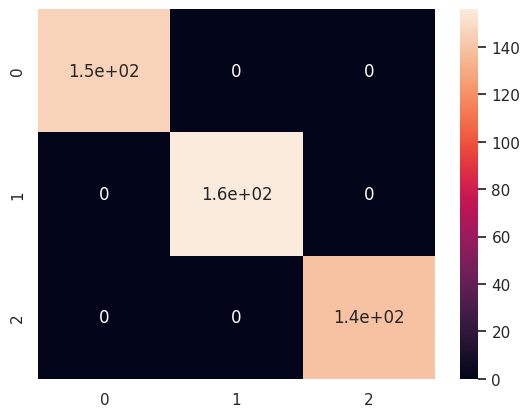

In [ ]:
pred_train_y=tpotc.predict(train_x)
pred_test_y=tpotc.predict(test_x)
accuracy_score_tpotc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_tpotc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_tpotc_train= ",accuracy_score_tpotc_train)
print("accuracy_score_tpotc_test= ",accuracy_score_tpotc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_tpotc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_tpotc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_tpotc_train= ",precision_score_tpotc_train)
print("precision_score_tpotc_test= ",precision_score_tpotc_test)

precision_score_tpotc_train=  0.99887013628981
precision_score_tpotc_test=  1.0


### Validate using testing

In [ ]:
scores=cross_validate(tpotc,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=5)
scores

In [ ]:
print("tpot_accuracy_score_target1= ",scores["test_accuracy"].mean())
print("tpot_precision_score_target1= ",scores["test_precision_weighted"].mean())

## Target 2

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,target_2,test_size=0.2,random_state=1)

In [ ]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classifiers)     target-2

In [ ]:
tpotc=TPOTClassifier(generations=20,population_size=50,scoring=["accuracy","precision"],cv=5, log_file = 'tpot.log'
                    random_state=2,verbosity=2,config_dict="TPOT light",n_jobs=-1)

In [ ]:
tpotc.fit(train_x,train_y)

In [ ]:
pred_train_y=tpotc.predict(train_x)
pred_test_y=tpotc.predict(test_x)
accuracy_score_tpotc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_tpotc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_tpotc_train= ",accuracy_score_tpotc_train)
print("accuracy_score_tpotc_test= ",accuracy_score_tpotc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_tpotc_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_tpotc_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_tpotc_train= ",precision_score_tpotc_train)
print("precision_score_tpotc_test= ",precision_score_tpotc_test)

In [ ]:
target2_pred_values=tpotc.predict(test_x)

## Target 3

In [ ]:
round((target_3.value_counts(normalize=True)),4)  #pump's condition is also good

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,target_3,test_size=0.2,random_state=1)

In [ ]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

# Models (classification)   target-3

In [ ]:
l_classifier = LogisticRegression(random_state=42)

In [ ]:
l_classifier.fit(train_x,train_y)

In [ ]:
pred_train_y=l_classifier.predict(train_x)
pred_test_y=l_classifier.predict(test_x)
accuracy_score_lr_train=accuracy_score(train_y,pred_train_y)
accuracy_score_lr_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_lr_train= ",accuracy_score_lr_train)
print("accuracy_score_lr_test= ",accuracy_score_lr_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_lr_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_lr_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_lr_train= ",precision_score_lr_train)
print("precision_score_lr_test= ",precision_score_lr_test)

### Validate using testing

In [ ]:
scores=cross_validate(l_classifier,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_lr_cross=scores["test_accuracy"].mean()
print("accuracy_score_lr_cross= ",accuracy_score_lr_cross)
precision_score_lr_cross=scores["test_precision_weighted"].mean()
print("precision_score_lr_cross= ",precision_score_lr_cross)

In [ ]:
target3_pred_values=l_classifier.predict(test_x)

## Target 4

In [ ]:
round((target_4.value_counts(normalize=True)),4)     #hydraulic accumulator's condition is not good

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x,target_4,test_size=0.2,random_state=1)

In [ ]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [ ]:
knn=KNeighborsClassifier(n_neighbors=5,p=2)
knn.fit(train_x,train_y)

pred_train_y=knn.predict(train_x)
pred_test_y=knn.predict(test_x)
accuracy_score_knn_train=accuracy_score(train_y,pred_train_y)
accuracy_score_knn_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_knn_train= ",accuracy_score_knn_train)
print("accuracy_score_knn_test= ",accuracy_score_knn_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_knn_train=precision_score(train_y,pred_train_y,average="weighted")
precision_score_knn_test=precision_score(test_y,pred_test_y,average="weighted")
print("precision_score_knn_train= ",precision_score_knn_train)
print("precision_score_knn_test= ",precision_score_knn_test)

### Validate using testing

In [ ]:
scores=cross_validate(knn,train_x,train_y,scoring=["accuracy","precision_weighted"],cv=10)
scores

In [ ]:
accuracy_score_knn_cross=scores["test_accuracy"].mean()
print("accuracy_score_knn_cross= ",accuracy_score_knn_cross)
precision_score_knn_cross=scores["test_precision_weighted"].mean()
print("precision_score_knn_cross= ",precision_score_knn_cross)

In [ ]:
target4_pred_values=knn.predict(test_x)

## Final Target

In [ ]:
y_ind=y.iloc[:,:-1]
y_ind.head()

In [ ]:
final_target.value_counts(normalize=True)
train_x,test_x,train_y,test_y=train_test_split(y_ind,final_target,test_size=0.2,random_state=1,stratify=final_target)

In [ ]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

accuracy_score_dtc_train=  0.9319727891156463
accuracy_score_dtc_test=  0.9160997732426304

confusion_matrix:-


<Axes: >

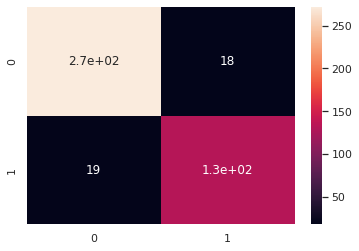

In [ ]:
dtc = DecisionTreeClassifier(criterion="entropy",random_state=1)

dtc.fit(train_x,train_y)

pred_train_y=dtc.predict(train_x)
pred_test_y=dtc.predict(test_x)
accuracy_score_dtc_train=accuracy_score(train_y,pred_train_y)
accuracy_score_dtc_test=accuracy_score(test_y,pred_test_y)
print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
print("\nconfusion_matrix:-")
sns.heatmap(confusion_matrix(test_y,pred_test_y),annot=True)

In [ ]:
precision_score_dtc_train=precision_score(train_y,pred_train_y)
precision_score_dtc_test=precision_score(test_y,pred_test_y)
print("precision_score_dtc_train= ",precision_score_dtc_train)
print("precision_score_dtc_test= ",precision_score_dtc_test)

precision_score_dtc_train=  0.886762360446571
precision_score_dtc_test=  0.88


### Validate using testing

In [ ]:
scores=cross_validate(dtc,train_x,train_y,scoring=["accuracy","precision"],cv=10)
scores

{'fit_time': array([0.0032804 , 0.00194407, 0.00163293, 0.00156879, 0.00154376,
        0.00156593, 0.00153947, 0.00151587, 0.00158834, 0.00151491]),
 'score_time': array([0.004246  , 0.00229692, 0.00217414, 0.00215602, 0.00219393,
        0.00210118, 0.00206614, 0.00204873, 0.00224423, 0.00208187]),
 'test_accuracy': array([0.92090395, 0.89830508, 0.9039548 , 0.91525424, 0.9375    ,
        0.91477273, 0.92613636, 0.90340909, 0.90909091, 0.90909091]),
 'test_precision': array([0.8852459 , 0.85245902, 0.87931034, 0.83823529, 0.91525424,
        0.82608696, 0.8852459 , 0.87719298, 0.84375   , 0.85714286])}

In [ ]:
accuracy_score_dtc_cross=scores["test_accuracy"].mean()
print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
precision_score_dtc_cross=scores["test_precision"].mean()
print("precision_score_dtc_cross= ",precision_score_dtc_cross)

accuracy_score_dtc_cross=  0.9138418079096043
precision_score_dtc_cross=  0.8659923492026238


# Final_data for testing with final_target

In [ ]:
df_final_data_testing_final_target = pd.DataFrame({"Valve_Condition":target2_pred_values
                                                 ,"Internal_Pump_Leakage":target3_pred_values,"Hydraulic_Accumulator":target4_pred_values})
df_final_data_testing_final_target.head()

,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,100.0,0.0,90.0
1,73.0,1.0,90.0
2,80.0,0.0,115.0
3,100.0,0.0,90.0
4,90.0,2.0,90.0


# Models for predicting machine failure before 30 minutes

In [ ]:
class Singleclass_Classification_Models:
    def __init__(self,train_x,test_x,train_y,test_y):
        self.train_x=train_x
        self.test_x=test_x
        self.train_y=train_y
        self.test_y=test_y

    def logistic_regression(self):
        global accuracy_score_log_reg_train,accuracy_score_log_reg_test,precision_score_log_reg_train,precision_score_log_reg_test,recall_score_log_reg_train,recall_score_log_reg_test
        log_reg=LogisticRegression(random_state=42)
        log_reg.fit(self.train_x,self.train_y)
        pred_train_y=log_reg.predict(self.train_x)
        pred_test_y=log_reg.predict(self.test_x)

        # accuracy_score
        accuracy_score_log_reg_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_log_reg_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_log_reg_train= ",accuracy_score_log_reg_train)
        print("accuracy_score_log_reg_test= ",accuracy_score_log_reg_test)
        print("\n")

        # precision-score
        precision_score_log_reg_train=precision_score(self.train_y,pred_train_y)
        precision_score_log_reg_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_log_reg_train= ",precision_score_log_reg_train)
        print("precision_score_log_reg_test= ",precision_score_log_reg_test)
        print("\n")

        # recall-score
        recall_score_log_reg_train=recall_score(self.train_y,pred_train_y)
        recall_score_log_reg_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_log_reg_train= ",recall_score_log_reg_train)
        print("recall_score_log_reg_test= ",recall_score_log_reg_test)
        print("\n")

        # cross-validate
        scores=cross_validate(log_reg,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_log_reg_cross=scores["test_accuracy"].mean()
        print("accuracy_score_log_reg_cross= ",accuracy_score_log_reg_cross)
        precision_score_log_reg_cross=scores["test_precision"].mean()
        print("precision_score_log_reg_cross= ",precision_score_log_reg_cross)
        recall_score_log_reg_cross=scores["test_recall"].mean()
        print("recall_score_log_reg_cross= ",recall_score_log_reg_cross)

        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")

    def knearestneighbors(self):
        global accuracy_score_kn_neighbors_train,accuracy_score_kn_neighbors_test,precision_score_kn_neighbors_train,precision_score_kn_neighbors_test,recall_score_kn_neighbors_train,recall_score_kn_neighbors_test
        kn_neighbors=KNeighborsClassifier(n_neighbors=7,p=2)
        kn_neighbors.fit(self.train_x,self.train_y)
        pred_train_y=kn_neighbors.predict(self.train_x)
        pred_test_y=kn_neighbors.predict(self.test_x)

        # accuracy_score
        accuracy_score_kn_neighbors_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_kn_neighbors_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_kn_neighbors_train= ",accuracy_score_kn_neighbors_train)
        print("accuracy_score_kn_neighbors_test= ",accuracy_score_kn_neighbors_test)
        print("\n")

        # precision-score
        precision_score_kn_neighbors_train=precision_score(self.train_y,pred_train_y)
        precision_score_kn_neighbors_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_kn_neighbors_train= ",precision_score_kn_neighbors_train)
        print("precision_score_kn_neighbors_test= ",precision_score_kn_neighbors_test)
        print("\n")

        # recall-score
        recall_score_kn_neighbors_train=recall_score(self.train_y,pred_train_y)
        recall_score_kn_neighbors_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_kn_neighbors_train= ",recall_score_kn_neighbors_train)
        print("recall_score_kn_neighbors_test= ",recall_score_kn_neighbors_test)
        print("\n")

        # cross-validate
        scores=cross_validate(kn_neighbors,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_kn_neighbors_cross=scores["test_accuracy"].mean()
        print("accuracy_score_kn_neighbors_cross= ",accuracy_score_kn_neighbors_cross)
        precision_score_kn_neighbors_cross=scores["test_precision"].mean()
        print("precision_score_kn_neighbors_cross= ",precision_score_kn_neighbors_cross)
        recall_score_kn_neighbors_cross=scores["test_recall"].mean()
        print("recall_score_kn_neighbors_cross= ",recall_score_kn_neighbors_cross)

        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")

    def Svc(self):
        global accuracy_score_svc_train,accuracy_score_svc_test,precision_score_svc_train,precision_score_svc_test,recall_score_svc_train,recall_score_svc_test
        svc=SVC(kernel="rbf")
        svc.fit(self.train_x,self.train_y)
        pred_train_y=svc.predict(self.train_x)
        pred_test_y=svc.predict(self.test_x)

        # accuracy_score
        accuracy_score_svc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_svc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_svc_train= ",accuracy_score_svc_train)
        print("accuracy_score_svc_test= ",accuracy_score_svc_test)
        print("\n")

        # precision-score
        precision_score_svc_train=precision_score(self.train_y,pred_train_y)
        precision_score_svc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_svc_train= ",precision_score_svc_train)
        print("precision_score_svc_test= ",precision_score_svc_test)
        print("\n")

        # recall-score
        recall_score_svc_train=recall_score(self.train_y,pred_train_y)
        recall_score_svc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_svc_train= ",recall_score_svc_train)
        print("recall_score_svc_test= ",recall_score_svc_test)
        print("\n")

        # cross-validate
        scores=cross_validate(svc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_svc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
        precision_score_svc_cross=scores["test_precision"].mean()
        print("precision_score_svc_cross= ",precision_score_svc_cross)
        recall_score_svc_cross=scores["test_recall"].mean()
        print("recall_score_svc_cross= ",recall_score_svc_cross)

        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")

    def naive_bayes(self):
        global accuracy_score_nbc_train,accuracy_score_nbc_test,precision_score_nbc_train,precision_score_nbc_test,recall_score_nbc_train,recall_score_nbc_test
        nbc=GaussianNB()
        nbc.fit(train_x,train_y)
        pred_train_y=nbc.predict(self.train_x)
        pred_test_y=nbc.predict(self.test_x)

        # accuracy_score
        accuracy_score_nbc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_nbc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
        print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
        print("\n")

        # precision-score
        precision_score_nbc_train=precision_score(self.train_y,pred_train_y)
        precision_score_nbc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_nbc_train= ",precision_score_nbc_train)
        print("precision_score_nbc_test= ",precision_score_nbc_test)
        print("\n")

        # recall-score
        recall_score_nbc_train=recall_score(self.train_y,pred_train_y)
        recall_score_nbc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_nbc_train= ",recall_score_nbc_train)
        print("recall_score_nbc_test= ",recall_score_nbc_test)
        print("\n")

        # cross-validate
        scores=cross_validate(nbc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_nbc_cross= ",accuracy_score_nbc_cross)
        precision_score_nbc_cross=scores["test_precision"].mean()
        print("precision_score_nbc_cross= ",precision_score_nbc_cross)
        recall_score_nbc_cross=scores["test_recall"].mean()
        print("recall_score_nbc_cross= ",recall_score_nbc_cross)

        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")

    def decision_tree(self):
        global accuracy_score_dtc_train,accuracy_score_dtc_test,precision_score_dtc_train,precision_score_dtc_test,recall_score_dtc_train,recall_score_dtc_test
        dtc=DecisionTreeClassifier(criterion="entropy",random_state=42)
        dtc.fit(train_x,train_y)
        pred_train_y=dtc.predict(self.train_x)
        pred_test_y=dtc.predict(self.test_x)

        # accuracy_score
        accuracy_score_dtc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_dtc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
        print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
        print("\n")

        # precision-score
        precision_score_dtc_train=precision_score(self.train_y,pred_train_y)
        precision_score_dtc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_dtc_train= ",precision_score_dtc_train)
        print("precision_score_dtc_test= ",precision_score_dtc_test)
        print("\n")

        # recall-score
        recall_score_dtc_train=recall_score(self.train_y,pred_train_y)
        recall_score_dtc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_dtc_train= ",recall_score_dtc_train)
        print("recall_score_dtc_test= ",recall_score_dtc_test)
        print("\n")

        # cross-validate
        scores=cross_validate(dtc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
        precision_score_dtc_cross=scores["test_precision"].mean()
        print("precision_score_dtc_cross= ",precision_score_dtc_cross)
        recall_score_dtc_cross=scores["test_recall"].mean()
        print("recall_score_dtc_cross= ",recall_score_dtc_cross)

        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")

    def random_forest(self):
        global accuracy_score_rfc_train,accuracy_score_rfc_test,precision_score_rfc_train,precision_score_rfc_test,recall_score_rfc_train,recall_score_rfc_test
        rfc=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
        rfc.fit(train_x,train_y)
        pred_train_y=rfc.predict(self.train_x)
        pred_test_y=rfc.predict(self.test_x)

        # accuracy_score
        accuracy_score_rfc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_rfc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
        print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
        print("\n")

        # precision-score
        precision_score_rfc_train=precision_score(self.train_y,pred_train_y)
        precision_score_rfc_test=precision_score(self.test_y,pred_test_y)
        print("precision_score_rfc_train= ",precision_score_rfc_train)
        print("precision_score_rfc_test= ",precision_score_rfc_test)
        print("\n")

        # recall-score
        recall_score_rfc_train=recall_score(self.train_y,pred_train_y)
        recall_score_rfc_test=recall_score(self.test_y,pred_test_y)
        print("recall_score_rfc_train= ",recall_score_rfc_train)
        print("recall_score_rfc_test= ",recall_score_rfc_test)
        print("\n")

        # cross-validate
        scores=cross_validate(rfc,self.train_x,self.train_y,scoring=["accuracy","precision","recall"],cv=10)
        accuracy_score_rfc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
        precision_score_rfc_cross=scores["test_precision"].mean()
        print("precision_score_rfc_cross= ",precision_score_rfc_cross)
        recall_score_rfc_cross=scores["test_recall"].mean()
        print("recall_score_rfc_cross= ",recall_score_rfc_cross)

        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")

    def best_model(self):
        pred_train_accuracy=[accuracy_score_log_reg_train,accuracy_score_kn_neighbors_train,accuracy_score_svc_train
                     ,accuracy_score_nbc_train,accuracy_score_dtc_train,accuracy_score_rfc_train]
        pred_test_accuracy=[accuracy_score_log_reg_test,accuracy_score_kn_neighbors_test,accuracy_score_svc_test
                             ,accuracy_score_nbc_test,accuracy_score_dtc_test,accuracy_score_rfc_test]
        pred_train_precision=[precision_score_log_reg_train,precision_score_kn_neighbors_train,precision_score_svc_train
                            ,precision_score_nbc_train,precision_score_dtc_train,precision_score_rfc_train]
        pred_test_precision=[precision_score_log_reg_test,precision_score_kn_neighbors_test,precision_score_svc_test
                             ,precision_score_nbc_test,precision_score_dtc_test,precision_score_rfc_test]
        pred_train_recall=[recall_score_log_reg_train,recall_score_kn_neighbors_train,recall_score_svc_train,recall_score_nbc_train
                          ,recall_score_dtc_train,recall_score_rfc_train]
        pred_test_recall=[recall_score_log_reg_test,recall_score_kn_neighbors_test,recall_score_svc_test,recall_score_nbc_test
                         ,recall_score_dtc_test,recall_score_rfc_test]

        df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
        df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])

        df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
        df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])

        df_train_recall=pd.DataFrame(pred_train_recall,columns=["train"])
        df_test_recall=pd.DataFrame(pred_test_recall,columns=["test"])

        df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
        df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
        df_recall=pd.concat([df_train_recall,df_test_recall],axis=1)
        df_best_model=pd.concat([df_accuracy,df_precision,df_recall],keys=["accuracy","precision","recall"],axis=1)
        df_best_model.set_axis(["logistic_reg_cl","knn_cl","sv_cl","naive-bayes_cl","decision_tree_cl","random_forest_cl"],axis=0,inplace=True)
        return df_best_model

In [ ]:
class Multiclass_Classification_Models:
    def __init__(self,train_x,test_x,train_y,test_y):
        self.train_x=train_x
        self.test_x=test_x
        self.train_y=train_y
        self.test_y=test_y

    def logistic_regression(self):
        global accuracy_score_log_reg_train,accuracy_score_log_reg_test,precision_score_log_reg_train,precision_score_log_reg_test,recall_score_log_reg_train,recall_score_log_reg_test
        log_reg=LogisticRegression(random_state=42)
        log_reg.fit(self.train_x,self.train_y)
        pred_train_y=log_reg.predict(self.train_x)
        pred_test_y=log_reg.predict(self.test_x)

        # accuracy_score
        accuracy_score_log_reg_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_log_reg_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_log_reg_train= ",accuracy_score_log_reg_train)
        print("accuracy_score_log_reg_test= ",accuracy_score_log_reg_test)
        print("\n")

        # precision-score
        precision_score_log_reg_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_log_reg_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_log_reg_train= ",precision_score_log_reg_train)
        print("precision_score_log_reg_test= ",precision_score_log_reg_test)
        print("\n")

        # recall-score
        recall_score_log_reg_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_log_reg_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_log_reg_train= ",recall_score_log_reg_train)
        print("recall_score_log_reg_test= ",recall_score_log_reg_test)
        print("\n")

        # cross-validate
        scores=cross_validate(log_reg,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_log_reg_cross=scores["test_accuracy"].mean()
        print("accuracy_score_log_reg_cross= ",accuracy_score_log_reg_cross)
        precision_score_log_reg_cross=scores["test_precision_weighted"].mean()
        print("precision_score_log_reg_cross= ",precision_score_log_reg_cross)
        recall_score_log_reg_cross=scores["test_recall_weighted"].mean()
        print("recall_score_log_reg_cross= ",recall_score_log_reg_cross)

        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")

    def knearestneighbors(self):
        global accuracy_score_kn_neighbors_train,accuracy_score_kn_neighbors_test,precision_score_kn_neighbors_train,precision_score_kn_neighbors_test,recall_score_kn_neighbors_train,recall_score_kn_neighbors_test
        kn_neighbors=KNeighborsClassifier(n_neighbors=7,p=2)
        kn_neighbors.fit(self.train_x,self.train_y)
        pred_train_y=kn_neighbors.predict(self.train_x)
        pred_test_y=kn_neighbors.predict(self.test_x)

        # accuracy_score
        accuracy_score_kn_neighbors_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_kn_neighbors_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_kn_neighbors_train= ",accuracy_score_kn_neighbors_train)
        print("accuracy_score_kn_neighbors_test= ",accuracy_score_kn_neighbors_test)
        print("\n")

        # precision-score
        precision_score_kn_neighbors_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_kn_neighbors_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_kn_neighbors_train= ",precision_score_kn_neighbors_train)
        print("precision_score_kn_neighbors_test= ",precision_score_kn_neighbors_test)
        print("\n")

        # recall-score
        recall_score_kn_neighbors_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_kn_neighbors_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_kn_neighbors_train= ",recall_score_kn_neighbors_train)
        print("recall_score_kn_neighbors_test= ",recall_score_kn_neighbors_test)
        print("\n")

        # cross-validate
        scores=cross_validate(kn_neighbors,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_kn_neighbors_cross=scores["test_accuracy"].mean()
        print("accuracy_score_kn_neighbors_cross= ",accuracy_score_kn_neighbors_cross)
        precision_score_kn_neighbors_cross=scores["test_precision_weighted"].mean()
        print("precision_score_kn_neighbors_cross= ",precision_score_kn_neighbors_cross)
        recall_score_kn_neighbors_cross=scores["test_recall_weighted"].mean()
        print("recall_score_kn_neighbors_cross= ",recall_score_kn_neighbors_cross)

        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")

    def Svc(self):
        global accuracy_score_svc_train,accuracy_score_svc_test,precision_score_svc_train,precision_score_svc_test,recall_score_svc_train,recall_score_svc_test
        svc=SVC(kernel="rbf")
        svc.fit(self.train_x,self.train_y)
        pred_train_y=svc.predict(self.train_x)
        pred_test_y=svc.predict(self.test_x)

        # accuracy_score
        accuracy_score_svc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_svc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_svc_train= ",accuracy_score_svc_train)
        print("accuracy_score_svc_test= ",accuracy_score_svc_test)
        print("\n")

        # precision-score
        precision_score_svc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_svc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_svc_train= ",precision_score_svc_train)
        print("precision_score_svc_test= ",precision_score_svc_test)
        print("\n")

        # recall-score
        recall_score_svc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_svc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_svc_train= ",recall_score_svc_train)
        print("recall_score_svc_test= ",recall_score_svc_test)
        print("\n")

        # cross-validate
        scores=cross_validate(svc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_svc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_svc_cross= ",accuracy_score_svc_cross)
        precision_score_svc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_svc_cross= ",precision_score_svc_cross)
        recall_score_svc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_svc_cross= ",recall_score_svc_cross)

        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")

    def naive_bayes(self):
        global accuracy_score_nbc_train,accuracy_score_nbc_test,precision_score_nbc_train,precision_score_nbc_test,recall_score_nbc_train,recall_score_nbc_test
        nbc=GaussianNB()
        nbc.fit(train_x,train_y)
        pred_train_y=nbc.predict(self.train_x)
        pred_test_y=nbc.predict(self.test_x)

        # accuracy_score
        accuracy_score_nbc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_nbc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_nbc_train= ",accuracy_score_nbc_train)
        print("accuracy_score_nbc_test= ",accuracy_score_nbc_test)
        print("\n")

        # precision-score
        precision_score_nbc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_nbc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_nbc_train= ",precision_score_nbc_train)
        print("precision_score_nbc_test= ",precision_score_nbc_test)
        print("\n")

        # recall-score
        recall_score_nbc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_nbc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_nbc_train= ",recall_score_nbc_train)
        print("recall_score_nbc_test= ",recall_score_nbc_test)
        print("\n")

        # cross-validate
        scores=cross_validate(nbc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_nbc_cross= ",accuracy_score_nbc_cross)
        precision_score_nbc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_nbc_cross= ",precision_score_nbc_cross)
        recall_score_nbc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_nbc_cross= ",recall_score_nbc_cross)

        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")

    def decision_tree(self):
        global accuracy_score_dtc_train,accuracy_score_dtc_test,precision_score_dtc_train,precision_score_dtc_test,recall_score_dtc_train,recall_score_dtc_test
        dtc=DecisionTreeClassifier(criterion="entropy",random_state=42)
        dtc.fit(train_x,train_y)
        pred_train_y=dtc.predict(self.train_x)
        pred_test_y=dtc.predict(self.test_x)

        # accuracy_score
        accuracy_score_dtc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_dtc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_dtc_train= ",accuracy_score_dtc_train)
        print("accuracy_score_dtc_test= ",accuracy_score_dtc_test)
        print("\n")

        # precision-score
        precision_score_dtc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_dtc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_dtc_train= ",precision_score_dtc_train)
        print("precision_score_dtc_test= ",precision_score_dtc_test)
        print("\n")

        # recall-score
        recall_score_dtc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_dtc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_dtc_train= ",recall_score_dtc_train)
        print("recall_score_dtc_test= ",recall_score_dtc_test)
        print("\n")

        # cross-validate
        scores=cross_validate(dtc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_nbc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_dtc_cross= ",accuracy_score_dtc_cross)
        precision_score_dtc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_dtc_cross= ",precision_score_dtc_cross)
        recall_score_dtc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_dtc_cross= ",recall_score_dtc_cross)

        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")

    def random_forest(self):
        global accuracy_score_rfc_train,accuracy_score_rfc_test,precision_score_rfc_train,precision_score_rfc_test,recall_score_rfc_train,recall_score_rfc_test
        rfc=RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
        rfc.fit(train_x,train_y)
        pred_train_y=rfc.predict(self.train_x)
        pred_test_y=rfc.predict(self.test_x)

        # accuracy_score
        accuracy_score_rfc_train=accuracy_score(self.train_y,pred_train_y)
        accuracy_score_rfc_test=accuracy_score(self.test_y,pred_test_y)
        print("accuracy_score_rfc_train= ",accuracy_score_rfc_train)
        print("accuracy_score_rfc_test= ",accuracy_score_rfc_test)
        print("\n")

        # precision-score
        precision_score_rfc_train=precision_score(self.train_y,pred_train_y,average="weighted")
        precision_score_rfc_test=precision_score(self.test_y,pred_test_y,average="weighted")
        print("precision_score_rfc_train= ",precision_score_rfc_train)
        print("precision_score_rfc_test= ",precision_score_rfc_test)
        print("\n")

        # recall-score
        recall_score_rfc_train=recall_score(self.train_y,pred_train_y,average="weighted")
        recall_score_rfc_test=recall_score(self.test_y,pred_test_y,average="weighted")
        print("recall_score_rfc_train= ",recall_score_rfc_train)
        print("recall_score_rfc_test= ",recall_score_rfc_test)
        print("\n")

        # cross-validate
        scores=cross_validate(rfc,self.train_x,self.train_y,scoring=["accuracy","precision_weighted","recall_weighted"],cv=10)
        accuracy_score_rfc_cross=scores["test_accuracy"].mean()
        print("accuracy_score_rfc_cross= ",accuracy_score_rfc_cross)
        precision_score_rfc_cross=scores["test_precision_weighted"].mean()
        print("precision_score_rfc_cross= ",precision_score_rfc_cross)
        recall_score_rfc_cross=scores["test_recall_weighted"].mean()
        print("recall_score_rfc_cross= ",recall_score_rfc_cross)

        # confusion_matrix
        print("\nconfusion_matrix:-")
        sns.heatmap(confusion_matrix(self.test_y,pred_test_y),annot=True)
        print("\n")

    def best_model(self):
        pred_train_accuracy=[accuracy_score_log_reg_train,accuracy_score_kn_neighbors_train,accuracy_score_svc_train
                     ,accuracy_score_nbc_train,accuracy_score_dtc_train,accuracy_score_rfc_train]
        pred_test_accuracy=[accuracy_score_log_reg_test,accuracy_score_kn_neighbors_test,accuracy_score_svc_test
                             ,accuracy_score_nbc_test,accuracy_score_dtc_test,accuracy_score_rfc_test]
        pred_train_precision=[precision_score_log_reg_train,precision_score_kn_neighbors_train,precision_score_svc_train
                            ,precision_score_nbc_train,precision_score_dtc_train,precision_score_rfc_train]
        pred_test_precision=[precision_score_log_reg_test,precision_score_kn_neighbors_test,precision_score_svc_test
                             ,precision_score_nbc_test,precision_score_dtc_test,precision_score_rfc_test]
        pred_train_recall=[recall_score_log_reg_train,recall_score_kn_neighbors_train,recall_score_svc_train,recall_score_nbc_train
                          ,recall_score_dtc_train,recall_score_rfc_train]
        pred_test_recall=[recall_score_log_reg_test,recall_score_kn_neighbors_test,recall_score_svc_test,recall_score_nbc_test
                         ,recall_score_dtc_test,recall_score_rfc_test]

        df_train_accuracy=pd.DataFrame(pred_train_accuracy,columns=["train"])
        df_test_accuracy=pd.DataFrame(pred_test_accuracy,columns=["test"])

        df_train_precision=pd.DataFrame(pred_train_precision,columns=["train"])
        df_test_precision=pd.DataFrame(pred_test_precision,columns=["test"])

        df_train_recall=pd.DataFrame(pred_train_recall,columns=["train"])
        df_test_recall=pd.DataFrame(pred_test_recall,columns=["test"])

        df_accuracy=pd.concat([df_train_accuracy,df_test_accuracy],axis=1)
        df_precision=pd.concat([df_train_precision,df_test_precision],axis=1)
        df_recall=pd.concat([df_train_recall,df_test_recall],axis=1)
        df_best_model=pd.concat([df_accuracy,df_precision,df_recall],keys=["accuracy","precision","recall"],axis=1)
        df_best_model.set_axis(["logistic_reg_cl","knn_cl","sv_cl","naive-bayes_cl","decision_tree_cl","random_forest_cl"],axis=0,inplace=True)
        return df_best_model

In [ ]:
y_30=y.iloc[29:,:]
y_30

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
29,3.0,100.0,0.0,130.0,1.0
30,3.0,100.0,0.0,130.0,1.0
31,3.0,100.0,0.0,130.0,1.0
32,3.0,100.0,0.0,130.0,1.0
33,3.0,100.0,0.0,130.0,1.0
...,...,...,...,...,...
2200,100.0,100.0,0.0,90.0,0.0
2201,100.0,100.0,0.0,90.0,0.0
2202,100.0,100.0,0.0,90.0,0.0
2203,100.0,100.0,0.0,90.0,0.0


In [ ]:
y_30.set_axis(range(2176),axis=0,inplace=True)
y_30.head()

,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator,Stable_Flag
0,3.0,100.0,0.0,130.0,1.0
1,3.0,100.0,0.0,130.0,1.0
2,3.0,100.0,0.0,130.0,1.0
3,3.0,100.0,0.0,130.0,1.0
4,3.0,100.0,0.0,130.0,1.0


In [ ]:
target_30_1=y_30.iloc[:,-5]
target_30_2=y_30.iloc[:,-4]
target_30_3=y_30.iloc[:,-3]
target_30_4=y_30.iloc[:,-2]
final_target_30=(y_30.iloc[:,-1]).astype(int)

In [ ]:
x_30=x.iloc[:-29,:]
x_30

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,TS2,TS3,TS4,VS1,CE,CP,SE
0,160.673492,109.466914,1.991475,0.000000,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,40.978767,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183
1,160.603320,109.354890,1.976234,0.000000,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,41.532767,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617
2,160.347720,109.158845,1.972224,0.000000,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,42.442450,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150
3,160.188088,109.064807,1.946576,0.000000,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,43.403983,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900
4,160.000472,108.931434,1.922707,0.000000,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,44.332750,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,161.330762,109.391923,1.986182,10.166749,9.935633,9.817360,2541.663667,6.669538,10.170395,35.543383,41.150083,38.462467,30.551800,0.544783,46.613717,2.165500,58.551017
2172,161.328250,109.408520,1.991729,10.171394,9.940836,9.821814,2543.085000,6.669263,10.172957,35.532383,41.146767,38.463683,30.558100,0.547117,46.574367,2.165100,58.492083
2173,161.337225,109.408112,1.995578,10.168695,9.941088,9.821787,2543.041167,6.672912,10.171420,35.526700,41.136983,38.440800,30.631567,0.545350,46.089483,2.140233,58.577500
2174,161.330980,109.374891,1.995951,10.171601,9.943033,9.823051,2542.839633,6.678212,10.175855,35.521967,41.121500,38.443783,30.493417,0.543583,46.894100,2.178367,58.687000


In [ ]:
df_final_30=pd.concat([x_30,y_30.iloc[:,:-1]],axis=1)
df_final_30

,PS1,PS2,PS3,PS4,PS5,PS6,ESP1,FS1,FS2,TS1,...,TS3,TS4,VS1,CE,CP,SE,Cooler_Condition,Valve_Condition,Internal_Pump_Leakage,Hydraulic_Accumulator
0,160.673492,109.466914,1.991475,0.000000,9.842169,9.728098,2538.929167,6.709815,10.304592,35.621983,...,38.471017,31.745250,0.576950,39.601350,1.862750,59.157183,3.0,100.0,0.0,130.0
1,160.603320,109.354890,1.976234,0.000000,9.635142,9.529488,2531.498900,6.715315,10.403098,36.676967,...,38.978967,34.493867,0.565850,25.786433,1.255550,59.335617,3.0,100.0,0.0,130.0
2,160.347720,109.158845,1.972224,0.000000,9.530548,9.427949,2519.928000,6.718522,10.366250,37.880800,...,39.631950,35.646150,0.576533,22.218233,1.113217,59.543150,3.0,100.0,0.0,130.0
3,160.188088,109.064807,1.946576,0.000000,9.438827,9.337429,2511.541633,6.720565,10.302678,38.879050,...,40.403383,36.579467,0.569267,20.459817,1.062150,59.794900,3.0,100.0,0.0,130.0
4,160.000472,108.931434,1.922707,0.000000,9.358762,9.260636,2503.449500,6.690308,10.237750,39.803917,...,41.310550,37.427900,0.577367,19.787017,1.070467,59.455267,3.0,100.0,0.0,130.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,161.330762,109.391923,1.986182,10.166749,9.935633,9.817360,2541.663667,6.669538,10.170395,35.543383,...,38.462467,30.551800,0.544783,46.613717,2.165500,58.551017,100.0,100.0,0.0,90.0
2172,161.328250,109.408520,1.991729,10.171394,9.940836,9.821814,2543.085000,6.669263,10.172957,35.532383,...,38.463683,30.558100,0.547117,46.574367,2.165100,58.492083,100.0,100.0,0.0,90.0
2173,161.337225,109.408112,1.995578,10.168695,9.941088,9.821787,2543.041167,6.672912,10.171420,35.526700,...,38.440800,30.631567,0.545350,46.089483,2.140233,58.577500,100.0,100.0,0.0,90.0
2174,161.330980,109.374891,1.995951,10.171601,9.943033,9.823051,2542.839633,6.678212,10.175855,35.521967,...,38.443783,30.493417,0.543583,46.894100,2.178367,58.687000,100.0,100.0,0.0,90.0


<Axes: >

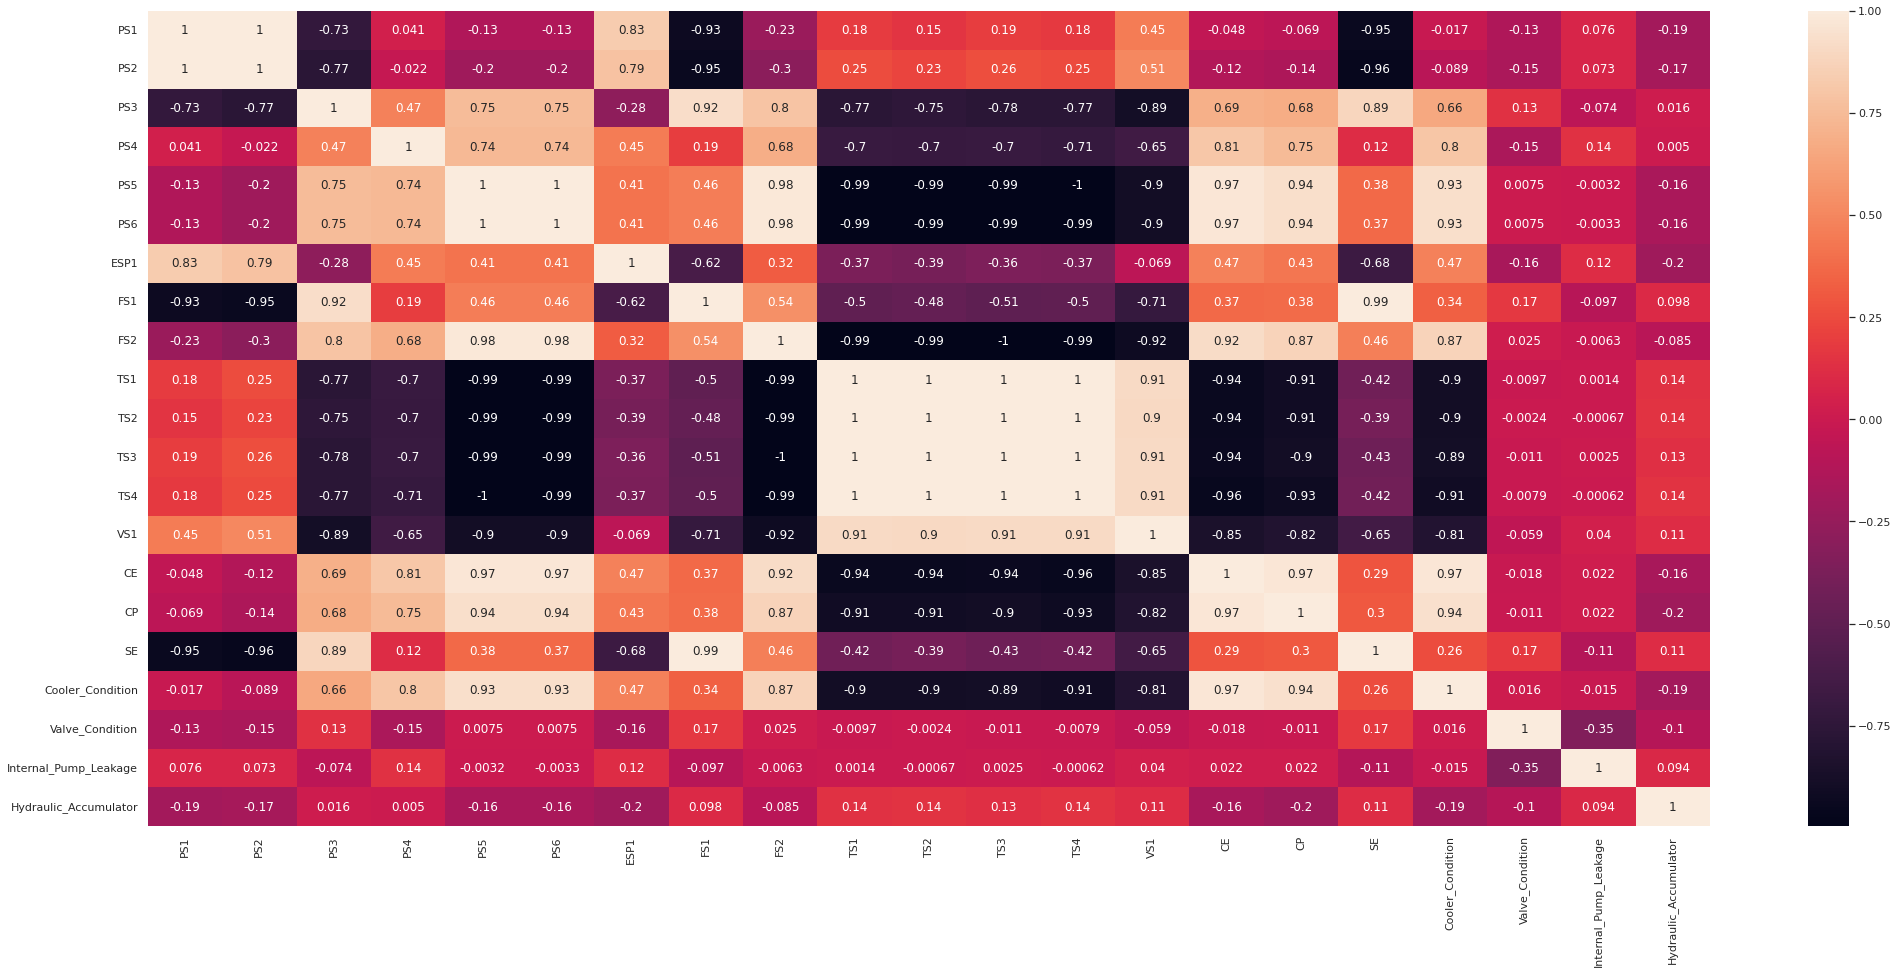

In [ ]:
fig=plt.gcf()
fig.set_size_inches((35,15))
sns.heatmap(df_final_30.corr(),annot=True)

## Target 1

In [ ]:
target_30_1.value_counts(normalize=True)
train_x,test_x,train_y,test_y=train_test_split(x_30,target_30_1,test_size=0.2,random_state=1)

In [ ]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

accuracy_score_kn_neighbors_train=  0.9936781609195402
accuracy_score_kn_neighbors_test=  0.9862385321100917


precision_score_kn_neighbors_train=  0.9936802743145406
precision_score_kn_neighbors_test=  0.9863849307046652


recall_score_kn_neighbors_train=  0.9936781609195402
recall_score_kn_neighbors_test=  0.9862385321100917


accuracy_score_kn_neighbors_cross=  0.9913793103448276
precision_score_kn_neighbors_cross=  0.9915538517538733
recall_score_kn_neighbors_cross=  0.9913793103448276

confusion_matrix:-




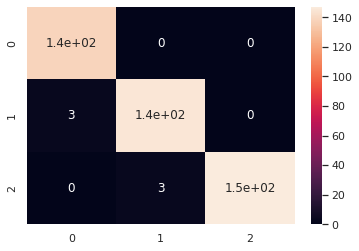

In [ ]:
all_models30_1=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)
all_models30_1.knearestneighbors()

## Target 2

In [ ]:
target_30_2.value_counts(normalize=True)
train_x,test_x,train_y,test_y=train_test_split(x_30,target_30_2,test_size=0.2,random_state=1)

In [ ]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

In [ ]:
tpotc=TPOTClassifier(generations=5,population_size=50,scoring=["accuracy","precision_weighted","recall_weighted"],cv=5,verbosity=2
                     ,n_jobs=-1,random_state=1,config_dict="TPOT light")
tpotc.fit(train_x,train_y)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7321839080459771

Generation 2 - Current best internal CV score: 0.8172413793103448

Generation 3 - Current best internal CV score: 0.8172413793103448

Generation 4 - Current best internal CV score: 0.8172413793103448

Generation 5 - Current best internal CV score: 0.8172413793103448

Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=2, p=1, weights=distance)


TPOTClassifier(config_dict='TPOT light', generations=5, n_jobs=-1,
               population_size=50, random_state=1,
               scoring=['accuracy', 'precision_weighted', 'recall_weighted'],
               verbosity=2)

In [ ]:
accuracy_score(test_y,tpotc.predict(test_x))

0.8188073394495413

In [ ]:
f1_score(test_y,tpotc.predict(test_x),average="weighted")

0.8201412562783483

## Target 3

In [ ]:
round(target_30_3.value_counts(normalize=True),4)
train_x,test_x,train_y,test_y=train_test_split(x_30,target_30_3,test_size=0.2,random_state=1)

In [ ]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

accuracy_score_kn_neighbors_train=  0.9362068965517242
accuracy_score_kn_neighbors_test=  0.9174311926605505


precision_score_kn_neighbors_train=  0.9358921271673468
precision_score_kn_neighbors_test=  0.9182199441367934


recall_score_kn_neighbors_train=  0.9362068965517242
recall_score_kn_neighbors_test=  0.9174311926605505


accuracy_score_kn_neighbors_cross=  0.9091954022988507
precision_score_kn_neighbors_cross=  0.9103219018987048
recall_score_kn_neighbors_cross=  0.9091954022988507

confusion_matrix:-




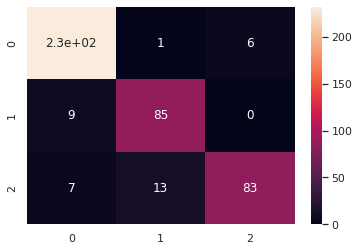

In [ ]:
all_models30_3=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)
all_models30_3.knearestneighbors()

## Target 4

In [ ]:
target_30_4.value_counts(normalize=True)
train_x,test_x,train_y,test_y=train_test_split(x_30,target_30_4,test_size=0.2,random_state=1)

In [ ]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

accuracy_score_kn_neighbors_train=  0.9511494252873564
accuracy_score_kn_neighbors_test=  0.9288990825688074


precision_score_kn_neighbors_train=  0.9517559372047104
precision_score_kn_neighbors_test=  0.9295832968947263


recall_score_kn_neighbors_train=  0.9511494252873564
recall_score_kn_neighbors_test=  0.9288990825688074


accuracy_score_kn_neighbors_cross=  0.9281609195402301
precision_score_kn_neighbors_cross=  0.9303779897489737
recall_score_kn_neighbors_cross=  0.9281609195402301

confusion_matrix:-




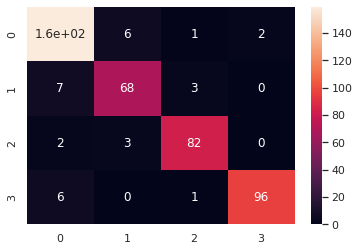

In [ ]:
all_models30_4=Multiclass_Classification_Models(train_x,test_x,train_y,test_y)
all_models30_4.knearestneighbors()

## Final Target

In [ ]:
final_target_30.value_counts(normalize=True)
train_x,test_x,train_y,test_y=train_test_split(y_30.iloc[:,:-1],final_target_30,test_size=0.2,random_state=1,stratify=final_target_30)

In [ ]:
sc=StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

accuracy_score_kn_neighbors_train=  0.9293103448275862
accuracy_score_kn_neighbors_test=  0.9243119266055045


precision_score_kn_neighbors_train=  0.8729641693811075
precision_score_kn_neighbors_test=  0.864516129032258


recall_score_kn_neighbors_train=  0.9225473321858864
recall_score_kn_neighbors_test=  0.9178082191780822


accuracy_score_kn_neighbors_cross=  0.9201149425287358
precision_score_kn_neighbors_cross=  0.8739724275952018
recall_score_kn_neighbors_cross=  0.889918176504968

confusion_matrix:-




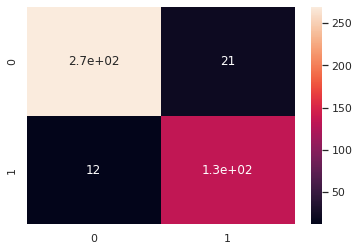

In [ ]:
all_models30_5=Singleclass_Classification_Models(train_x,test_x,train_y,test_y)
all_models30_5.knearestneighbors()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=7,p=2)
knn.fit(train_x,train_y)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
metrics.roc_auc_score(test_y,knn.predict_proba(test_x)[:,1])

0.9648677373641947

In [ ]:
from sklearn import metrics

In [ ]:
metrics.plot_roc_curve(knn,test_x,test_y)

## Sending email

In [ ]:
import smtplib, ssl

In [ ]:
mach = "Hydraullic machine"

In [ ]:
port = 465  # For SSL
smtp_server = "smtp.gmail.com"
sender_email = "helly.dhamesha2020@vitstudent.ac.in"
receiver_email = "rahul.gandhi2020@vitstudent.ac.in"
password = "Helly#1704"
subject = "IOT predictive maintenance"
message = "Maintenance required for " + mach + "in 30 minutes"

In [ ]:
context = ssl.create_default_context()
with smtplib.SMTP_SSL(smtp_server, port, context=context) as server:
    server.login(sender_email, password)
    server.sendmail(sender_email, receiver_email, subject, message)

In [ ]:
import numpy as np
array = np.loadtxt('prob1.csv', delimiter=',', skiprows=1)
print(array)

[[6.29900000e+01 1.23270000e+02 9.93600000e+01 ... 7.67826087e+03
  0.00000000e+00 0.00000000e+00]
 [6.14000000e+01 1.25860000e+02 8.64200000e+01 ... 7.59696970e+03
  0.00000000e+00 0.00000000e+00]
 [6.31600000e+01 1.39130000e+02 9.04600000e+01 ... 6.58571429e+03
  0.00000000e+00 0.00000000e+00]
 ...
 [6.47500000e+01 1.26290000e+02 9.28600000e+01 ... 6.78375000e+03
  0.00000000e+00 0.00000000e+00]
 [6.19500000e+01 1.78000000e+02 9.87500000e+01 ... 7.66849315e+03
  1.00000000e+00 2.00000000e+00]
 [6.43000000e+01 1.39550000e+02 9.54000000e+01 ... 7.00000000e+03
  0.00000000e+00 0.00000000e+00]]
